# UNSUPERVISED LEARNING - K Means Clustering, Agglomerative Clustering & DBSCAN

### EXAMPLE

#### Imagine we have 19 data points that look like this:

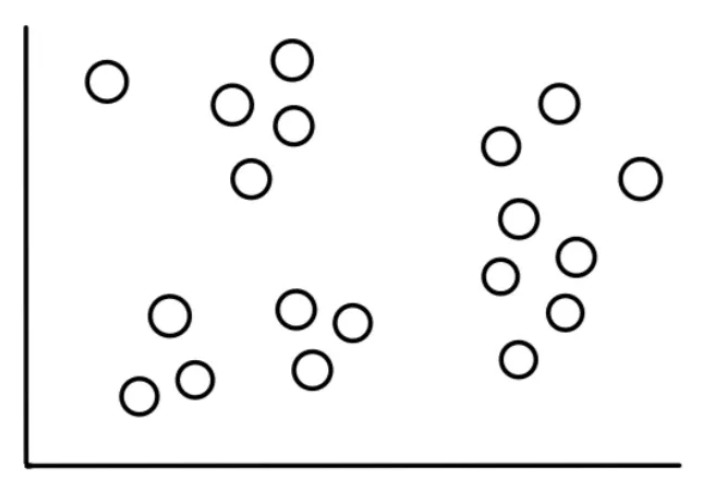





#### Now assume that we know this data fits into 3, relatively obvious, categories that look like this:

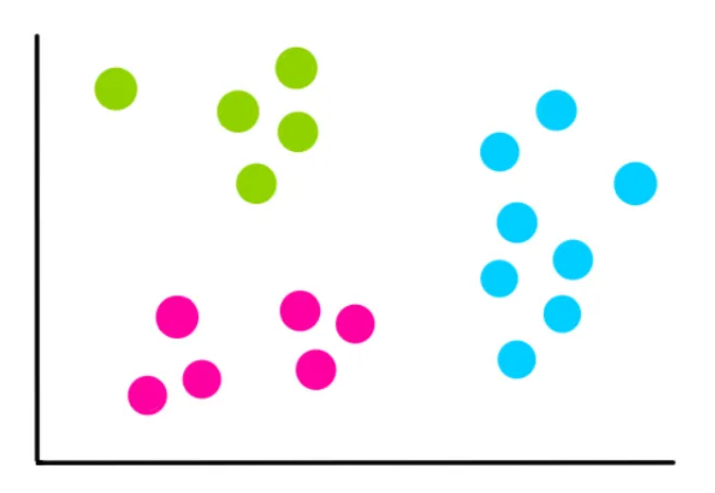

Our task is to use the k-means Clustering algorithm to do this categorization.


### Step 1: Select the Number of Clusters, k
The number of clusters we want to identify is the k in k-means clustering. In this case, since we assumed that there are 3 clusters, k = 3.

### Step 2: Select k Points at Random
We start the process of finding clusters by selecting 3 random points (not necessarily our data points). These points will now act as centroids, or the center, of clusters that we are going to make:

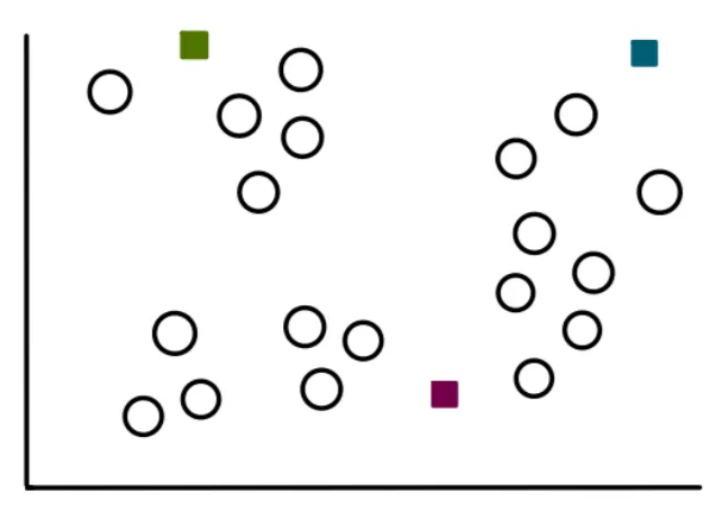



### Step 3: Make k Clusters
To make the clusters, we start by measuring the distance from each data point to each of the 3 centroids. And we assign the points to the cluster closest to it. So for a sample point, the distances will look like this:

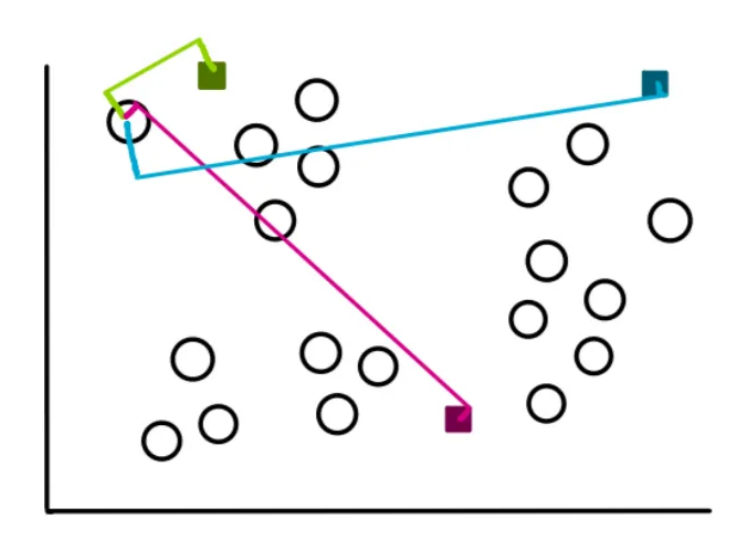

By just looking at it, we see that the distance from the point to the green centroid is the least, so we assign the point to the green cluster.

In two dimensions, the formula to find the distance between two points is:

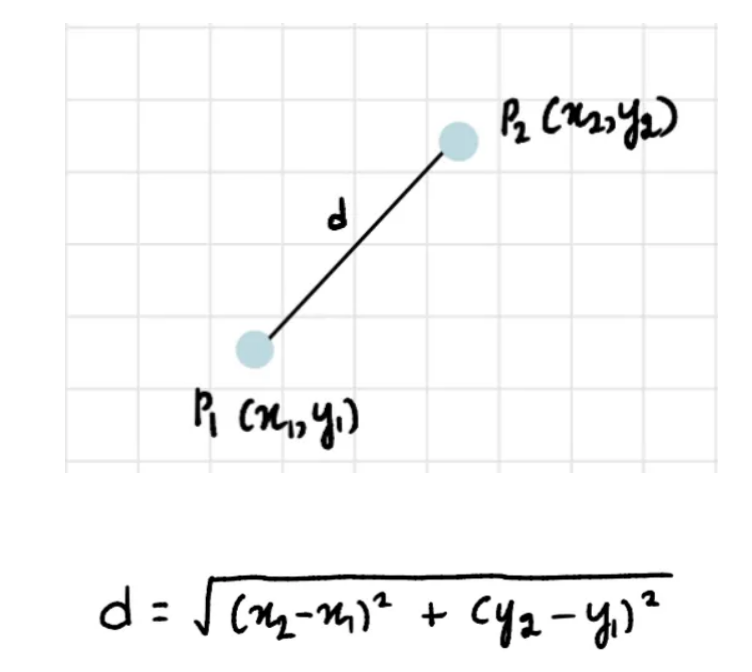

Using the above formula, we repeat this process for the rest of the points and the clusters will look something like this:

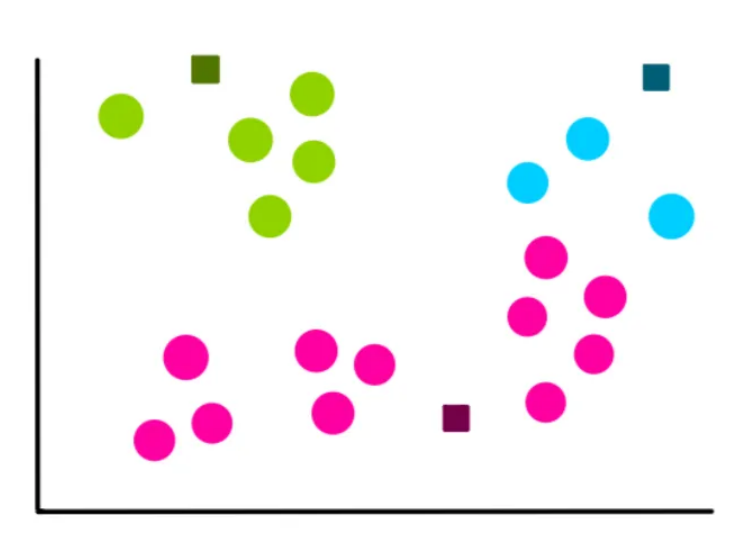

### Step 4: Compute New Centroid of Each Cluster
Now that we have our 3 clusters, we find the new centroids formed by each of them. For instance, the way we calculate the coordinates of the centroid of the blue cluster is:

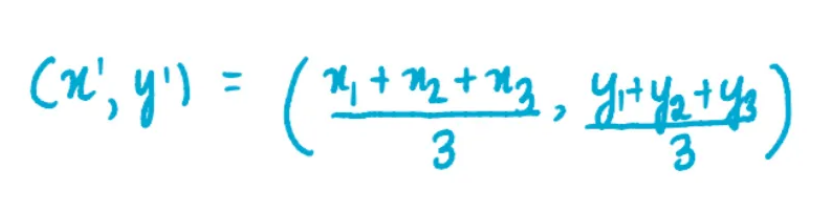

where x1, x2, and x3 are the x-coordinates of each of the 3 points of the blue cluster. And y1, y2, and y3 are the y-coordinates of each of the 3 points of the blue cluster. We divide the sum of the coordinates by 3 because there are 3 data points in the blue cluster. Similarly, the coordinates of the centroids of the pink and green clusters are:


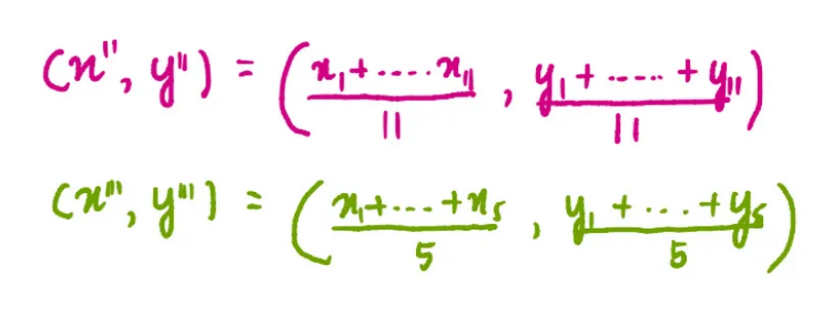

So, the new centroids look like this:

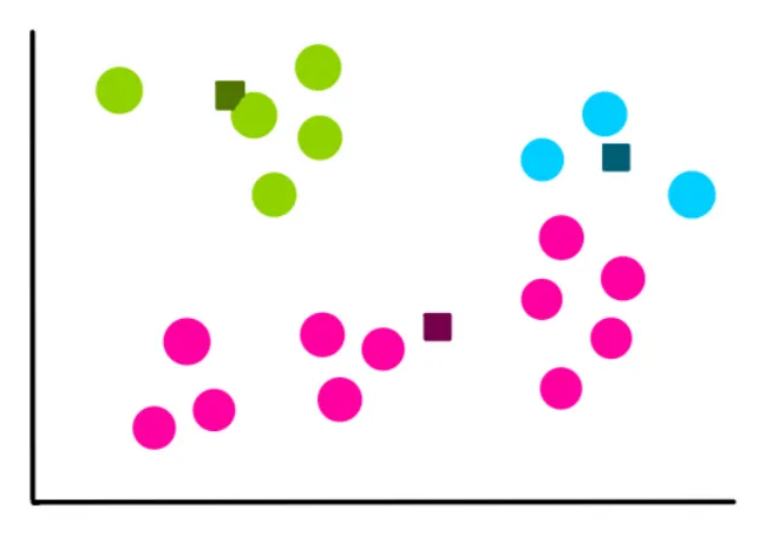



### Step 5: Assess the Quality of Each Cluster
Since k-means can’t see the clustering as we can, it measures the quality by finding the variation within all the clusters. The basic idea behind k-means clustering is defining clusters so that the within-cluster variation is minimized. We calculate something called Within-Cluster Sum of Squares (WCSS) to quantify this variance:

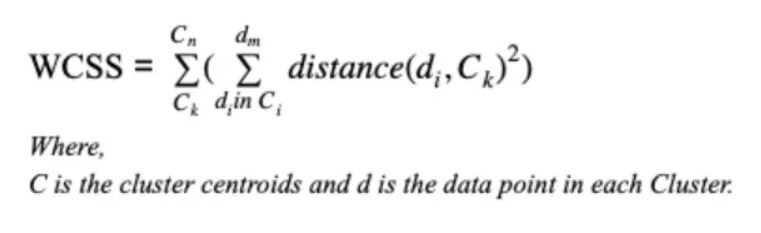

This is a scary-looking formula, so if you don't really understand it that’s okay; just try to understand the intuition behind it.

For simplification purposes, let’s represent the variation visually like this:

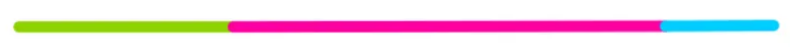

### Step 6: Repeat Steps 3–5
Once we have previous clusters and the variation stored, we start all over. But only this time we use the centroids we calculated previously to - make 3 new clusters, recalculate the center of the new clusters, and calculate the sum of the variation within all the clusters.

Let’s suppose the next 4 iterations look like this:

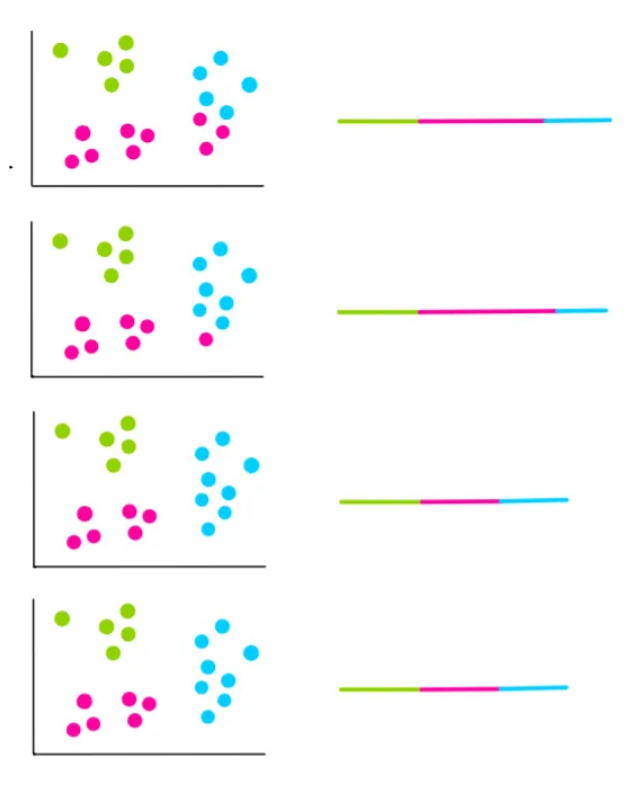

From the last two iterations, we see that the clusters haven’t changed. This means that the algorithm has converged and we stop the clustering process. We then choose the clusters with the least WCSS. This also happens to be those of the last two iterations. So, they are going to be our final clusters.

### How do we choose k?
In our example, we conveniently knew that we need 3 clusters. But what if we don't know how many clusters we have, then how do we choose k?

In this case, we try multiple k values and calculate the WCSS.

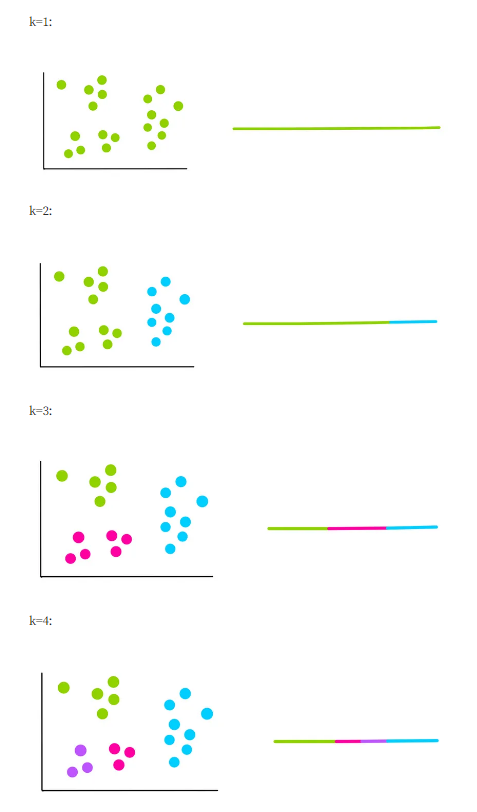

We notice that each time we add a new cluster, the total variation within each cluster is smaller than before. And when there is only one point per cluster, the variation = 0.

#### NB: Measures of variation are statistics of how far away the values in the observations (data points) are from each other.

So, we need to use something called an elbow plot to find the best k. It plots the WCSS against the number of clusters or k.

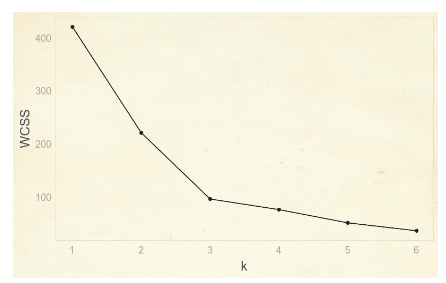

This is called an elbow plot because we can find an optimal k value by finding the “elbow” of the plot, which is at 3. Until 3 you can notice a huge reduction in variation, but after that, the variation doesn't go down as quickly.

And that’s about it. A simple, but effective clustering algorithm!

# How can you code a K-means clustering model in python

1.   #### Dropping unnecessary rows/columns before clustering

We’ll work with a dataset from Kaggle.

https://www.kaggle.com/datasets/vetrirah/customer

The dataset contains customer data, like gender, age, profession, size of family, etc. Our plan is to create clusters out of these customers.

Read in the dataset, save it to df, and view five random rows of it with the sample method:


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Data-Science-Datasets/main/Customer_data.csv", on_bad_lines='skip')
df = pd.read_csv("segmentation data.csv")

In [5]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


It’s always recommended to get a general sense of the dataset you’re working with, so let’s do just that with df.info():

In [8]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
df.shape

(2000, 8)

In [10]:
df.drop(['ID'], inplace = True, axis = 1)

In [11]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


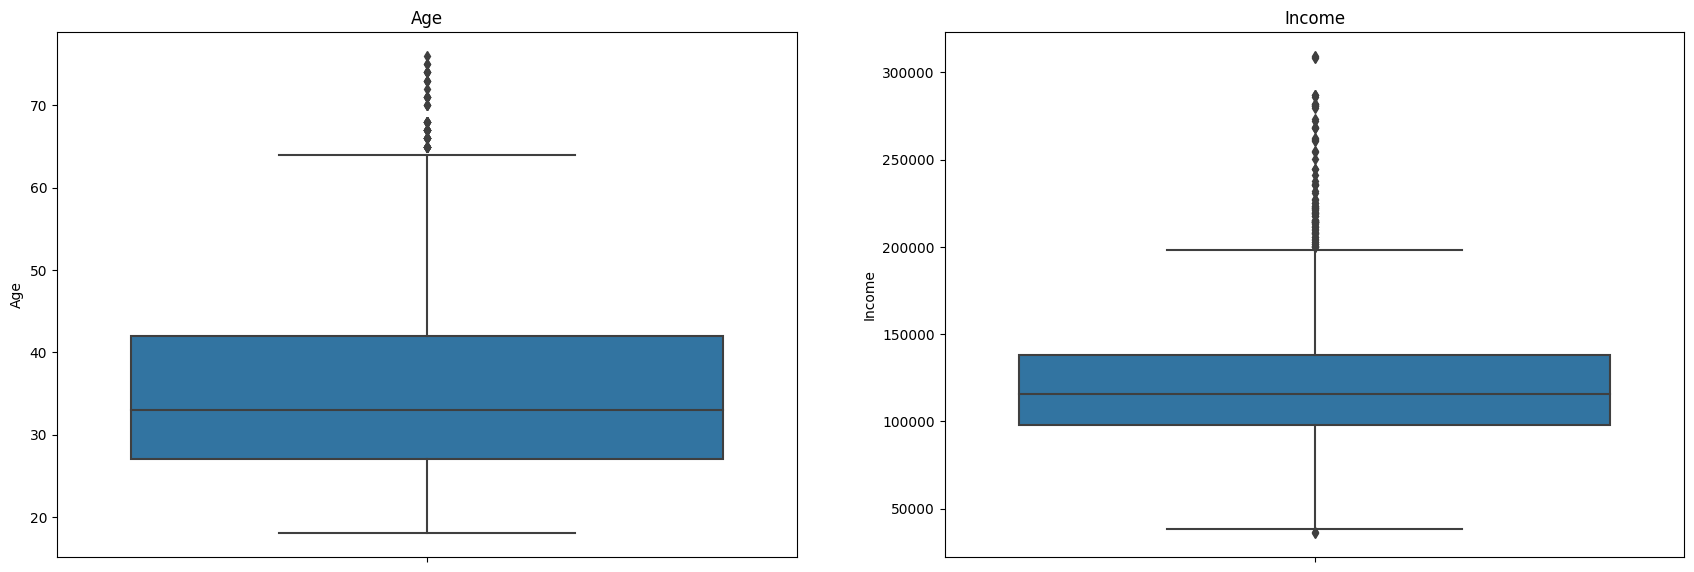

In [12]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Income)
plt.title("Income")

plt.show()

In [13]:
df.Age.describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [14]:
df.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

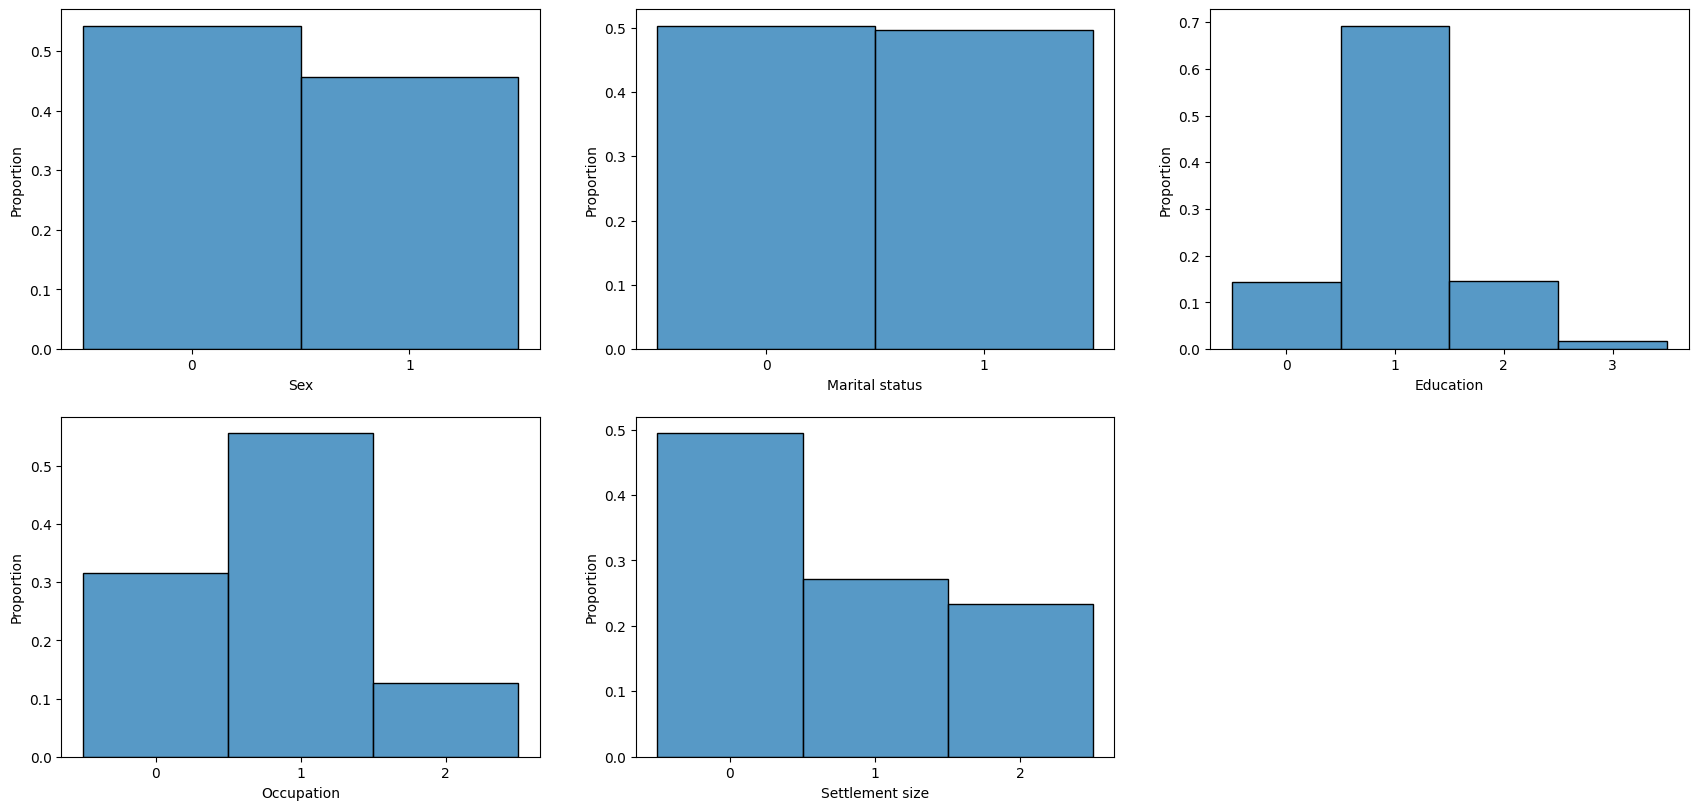

In [15]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(df.Sex.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(df['Marital status'].astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(df.Education.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(df.Occupation.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,1))
sns.histplot(df['Settlement size'].astype(str).sort_values(), stat='proportion')

plt.show()

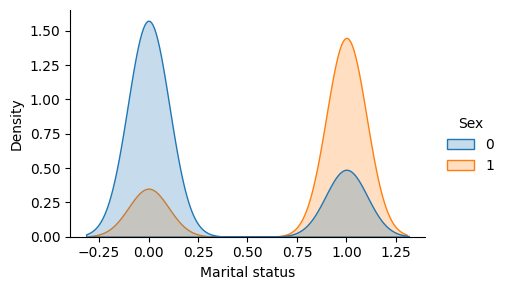

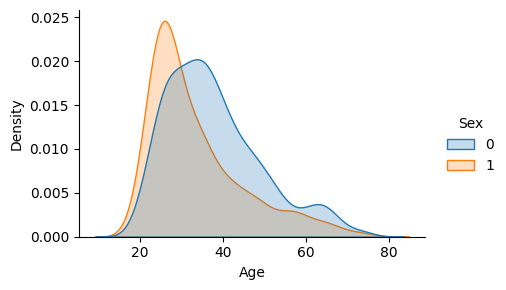

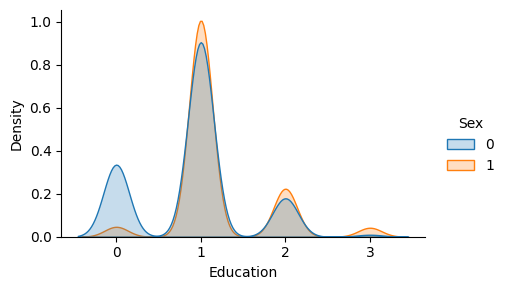

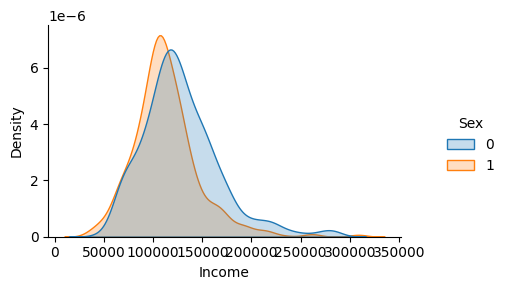

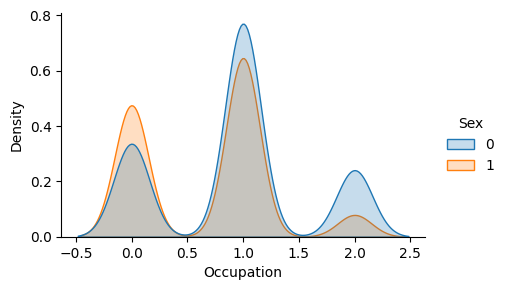

In [20]:
import warnings 

warnings.filterwarnings('ignore')


# Make the plots
sns.displot(df, x=df['Marital status'], hue="Sex", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['Age'], hue="Sex", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['Education'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['Income'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['Occupation'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)

# Display the plots
plt.show()

In [21]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


### Need for Standardization
Before getting into Standardization, let us first understand the concept of Scaling.

Scaling of Features is an essential step in modeling the algorithms with the datasets. The data that is usually used for the purpose of modeling is derived through various means such as:

- Questionnaire
- Surveys
- Research
- Scraping, etc.

So, the data obtained contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely.

It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

#### This is when standardization comes into picture.

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

- mean - 0 (zero)
- standard deviation - 1

In [22]:
data=scaled[['Age','Income']]
data.head()

,Age,Income
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


In [23]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,4000.000000,1
1,2260.203473,2
2,1647.539023,3
3,1281.143083,4
4,1024.223911,5
5,865.982269,6
6,751.012078,7
7,666.039895,8
8,583.033359,9
9,511.222055,10


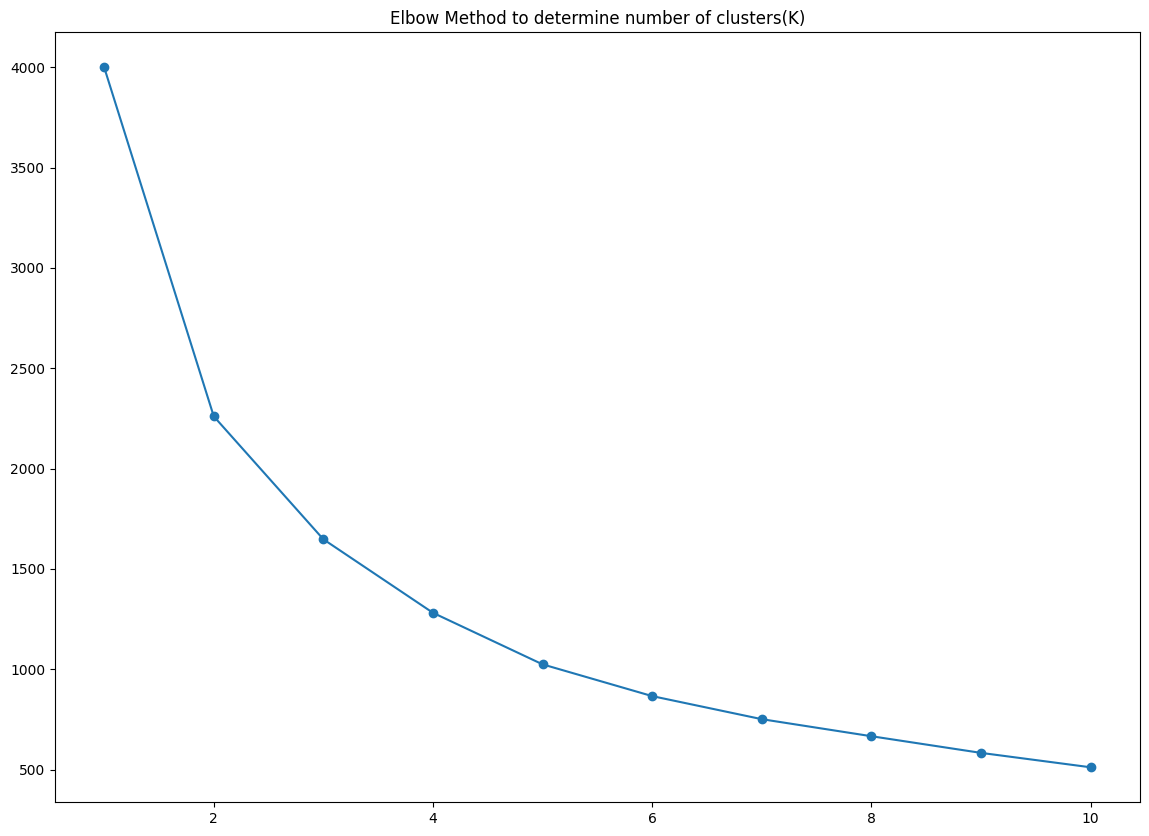

In [24]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means Clustering

In [25]:
#Algorithm

kmeans=KMeans(n_clusters=4,random_state=0) 
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [26]:
prediction=kmeans.fit_predict(data)
prediction

clustered_data = df.copy()
clustered_data["cluster_index"] = prediction

In [27]:
clustered_data


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_index
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,1
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,0
1998,1,1,24,1,97968,0,0,0


<AxesSubplot:xlabel='Age', ylabel='Income'>

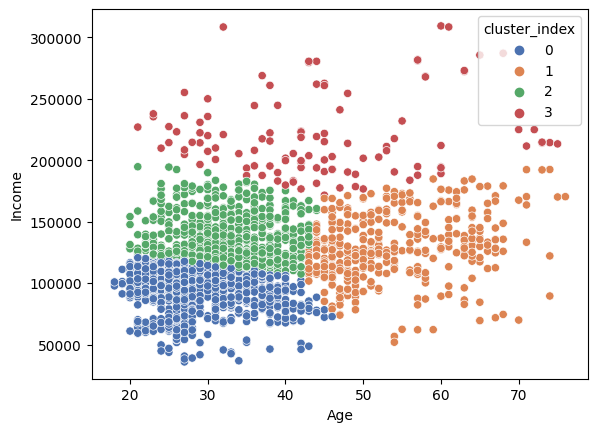

In [28]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [30]:
clustered_data.cluster_index.unique()

array([1, 2, 3, 0])

### Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

#### 1: Means clusters are well apart from each other and clearly distinguished.

#### 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

#### -1: Means clusters are assigned in the wrong way.


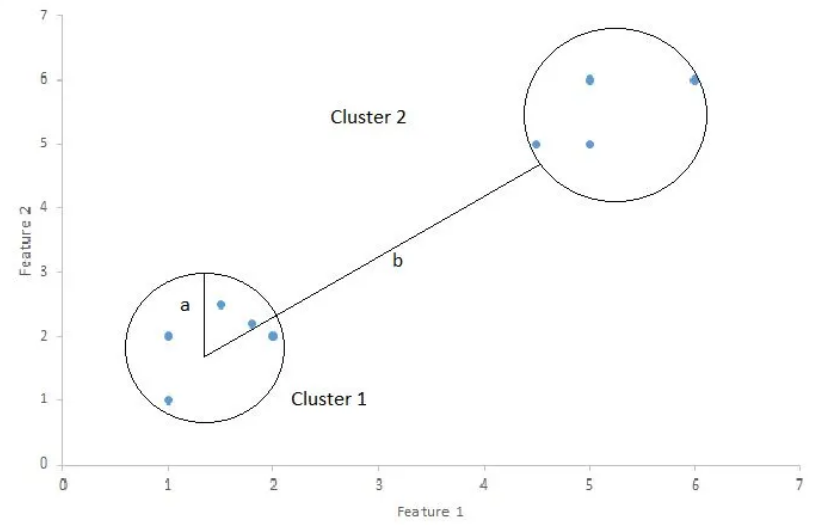

##### Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [31]:
score = silhouette_score(df, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.238 ~ 0


## Agglomerative Clustering
It is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

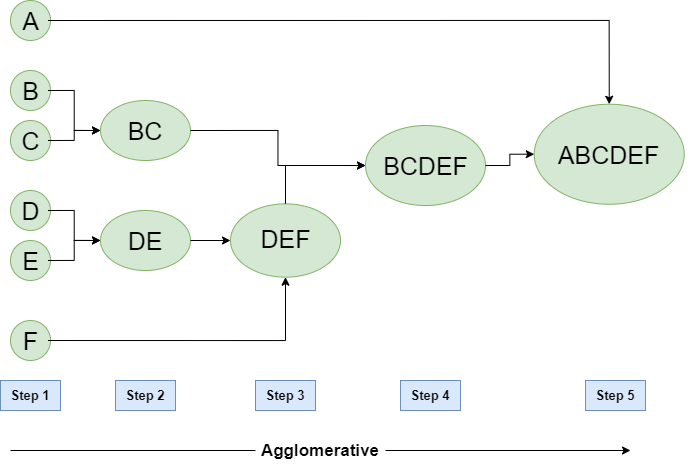


In [35]:
agc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [48]:
agg_predict = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.25080894270462684


In [51]:
agg_cluster = df.copy()
agg_cluster["cluster_index"] = agg_predict
agg_cluster.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_index
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


<AxesSubplot:xlabel='Age', ylabel='Income'>

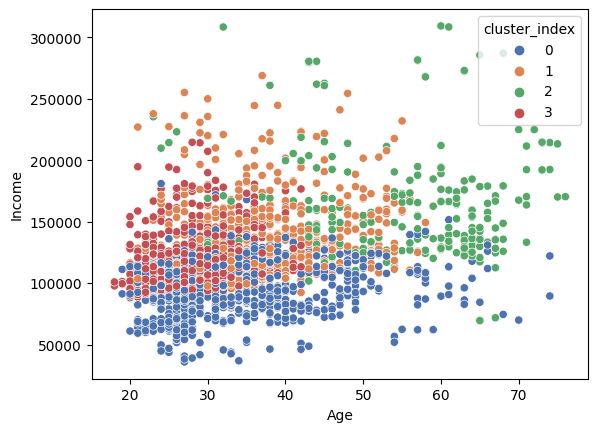

In [52]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster.Age,
                y=agg_cluster.Income,
                hue=agg_cluster.cluster_index,
                palette="deep")

In [42]:
!pip install plotly


     ---------------------------------------- 15.5/15.5 MB 5.2 MB/s eta 0:00:00
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)


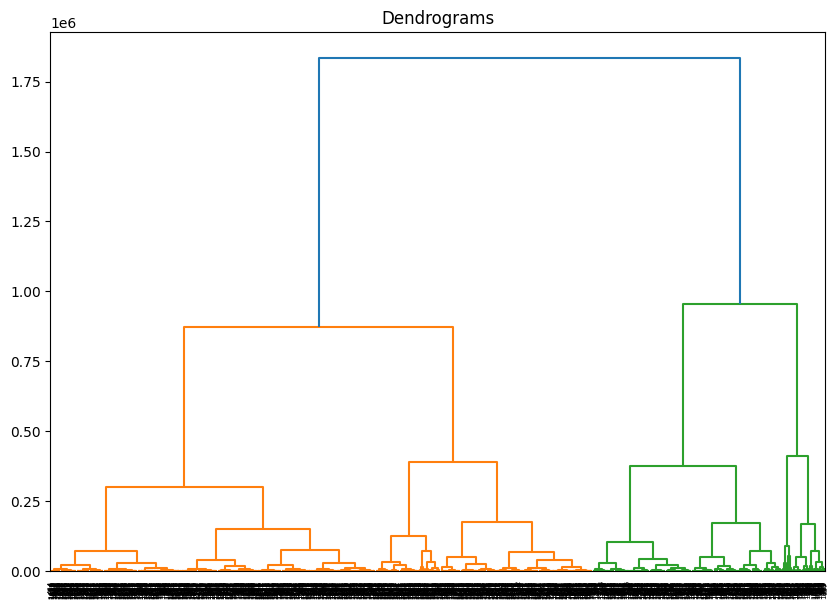

In [56]:
x=agg_cluster.Age
y=agg_cluster.cluster_index
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(agg_cluster, method='ward'))

## DBSCAN (Density-Based Spatial Clustering Of Applications With Noise)

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

#### K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.

Let’s try to understand it with an example. Here we have data points densely present in the form of concentric circles:

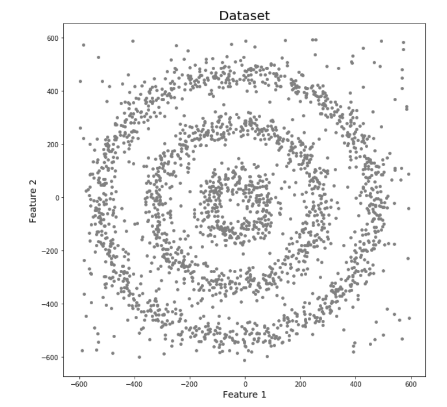

We can see three different dense clusters in the form of concentric circles with some noise here. Now, let’s run K-Means and Hierarchical clustering algorithms and see how they cluster these data points.

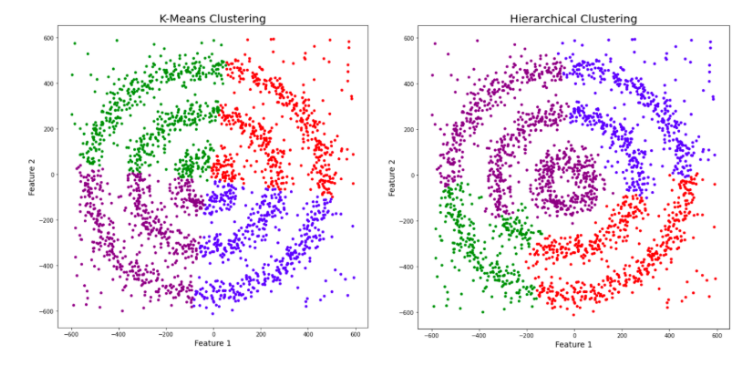

You might be wondering why there are four colors in the graph? As I said earlier, this data contains noise too, therefore, I have taken noise as a different cluster which is represented by the purple color. Sadly, both of them failed to cluster the data points. Also, they were not able to properly detect the noise present in the dataset. Now, let’s take a look at the results from DBSCAN clustering.

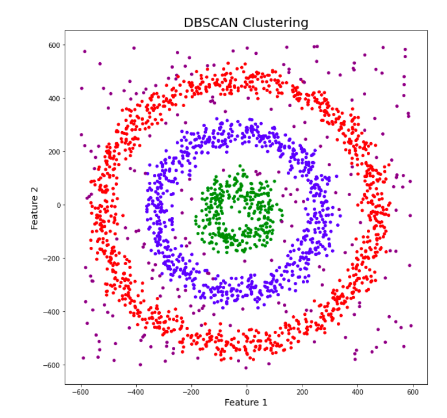

DBSCAN is not just able to cluster the data points correctly, but it also perfectly detects noise in the dataset.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

Let’s understand it with the help of an example.

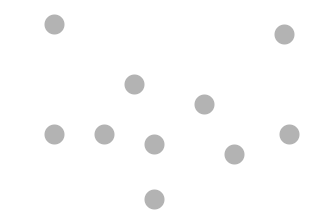


Here, we have some data points represented by grey color. Let’s see how DBSCAN clusters these data points.


#### DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise. 
A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise.

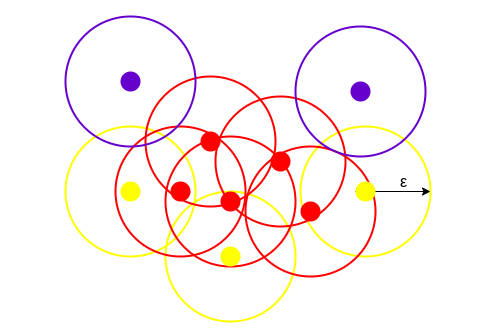

In [38]:
dbs = DBSCAN(eps=2, min_samples=10)
dbs.fit_predict(scaled)
score = silhouette_score(scaled, dbs.labels_, random_state=0)
print(f"Silhouette score: {score:0.3f}")

Silhouette score: 0.179


# K-means from scratch

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


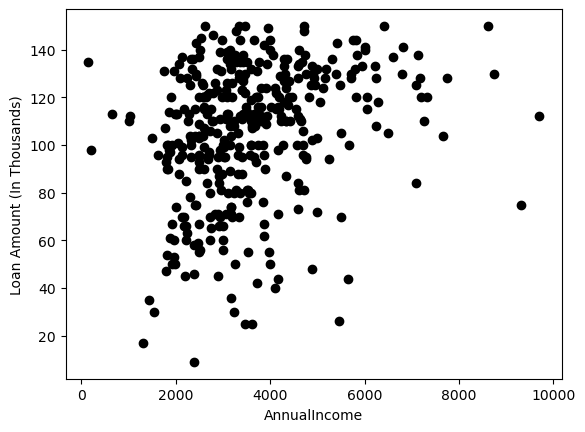

In [4]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

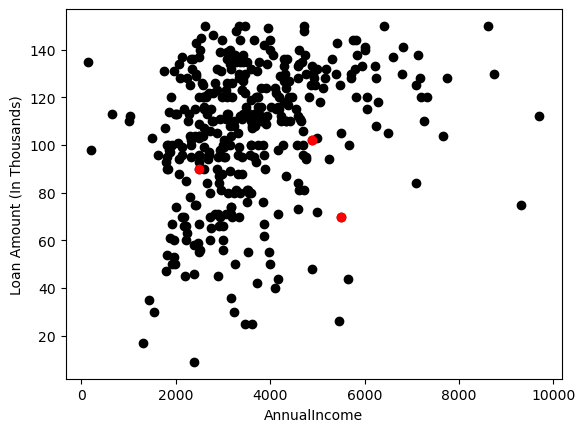

In [8]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [6]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

294.98852727378676
216.30028144385471
169.46106058187374


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

198.9136595178422
52.84741626127729


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

98.54724443834282
90.64953219227577
18.274686272279013


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

9.21023994083339
18.345487493007468


C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\hp\AppData\Local\Temp\ipykernel_3708\2856282022.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

46.27013250786139
0.0


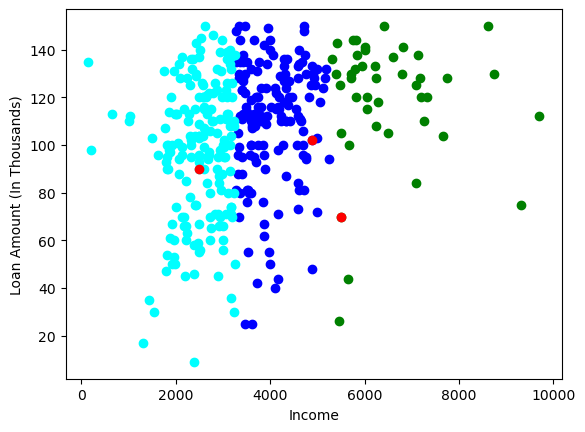

In [9]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()